model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('housedataset.csv')

In [ ]:
df.head()

,DATE,HNFSEPUSSA,HOUST1F,HSN1F,INTDSRUSM193N,LFACTTTTUSM657S,MSACSR,NA000334Q,NASDAQCOM,PERMIT,PERMIT1,QUSR628BIS,RSAHORUSQ156S,TTLCONS,UNRATE,Median Home Price (NSA),CPI-Adjusted Price,CSUSHPISA
0,1/1/2000,311,1268,873,5.00,1.490972,4.3,2448892,4013.494000,1727,1277,95.3071,67.1,784940,4.0,131559.13,239289.53,100.551
1,2/1/2000,299,1255,856,5.24,0.132849,4.3,2448892,4410.871000,1692,1241,95.3071,67.1,793737,4.1,131318.85,237445.83,101.339
2,3/1/2000,313,1313,900,5.34,-0.015443,4.3,2448892,4802.988261,1651,1253,95.3071,67.1,809459,4.0,132827.82,238210.25,102.127
3,4/1/2000,305,1275,841,5.50,0.222559,4.4,2569266,3863.637368,1597,1192,96.7197,67.3,804766,3.8,134096.51,240345.10,102.922
4,5/1/2000,305,1230,857,5.71,-0.254289,4.4,2569266,3528.416818,1543,1182,96.7197,67.3,805005,4.0,135144.14,241940.32,103.678


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
# Standardization
# Convert numeric columns with commas to floats
for col in df.columns[1:]:  # Iterate over columns starting from the second one
    if df[col].dtype == 'object':  # Check if the column is of object type (likely string)
        try:
            df[col] = df[col].str.replace(',', '', regex=True).astype(float)
        except:
            pass  # Skip columns that cannot be converted to float

x_scaled = scaler.fit_transform(df.iloc[:, 1:])

In [ ]:
b=pd.DataFrame(x_scaled)

In [ ]:
b.insert(0,'DATE', df['DATE'])

In [ ]:
b.columns=df.columns

In [ ]:
b.head()

,DATE,HNFSEPUSSA,HOUST1F,HSN1F,INTDSRUSM193N,LFACTTTTUSM657S,MSACSR,NA000334Q,NASDAQCOM,PERMIT,PERMIT1,QUSR628BIS,RSAHORUSQ156S,TTLCONS,UNRATE,Median Home Price (NSA),CPI-Adjusted Price,CSUSHPISA
0,1/1/2000,-0.117851,0.792321,0.625224,1.629867,4.162268,-0.865125,-1.495664,-0.148195,0.801620,0.909731,-1.382330,0.400676,-1.072821,-0.883367,-1.454372,-1.200356,-1.475067
1,2/1/2000,-0.224915,0.758162,0.564552,1.763426,0.202344,-0.865125,-1.495664,-0.138734,0.724223,0.812796,-1.382330,0.400676,-1.047876,-0.832521,-1.458423,-1.240600,-1.460321
2,3/1/2000,-0.100007,0.910563,0.721585,1.819076,-0.230036,-0.865125,-1.495664,-0.129397,0.633557,0.845107,-1.382330,0.400676,-1.003293,-0.883367,-1.432986,-1.223914,-1.445575
3,4/1/2000,-0.171383,0.810714,0.511018,1.908115,0.463916,-0.813999,-1.395643,-0.151764,0.514143,0.680857,-1.309839,0.514598,-1.016601,-0.985060,-1.411599,-1.177315,-1.430697
4,5/1/2000,-0.171383,0.692472,0.568121,2.024980,-0.926445,-0.813999,-1.395643,-0.159745,0.394729,0.653931,-1.309839,0.514598,-1.015924,-0.883367,-1.393939,-1.142495,-1.416550


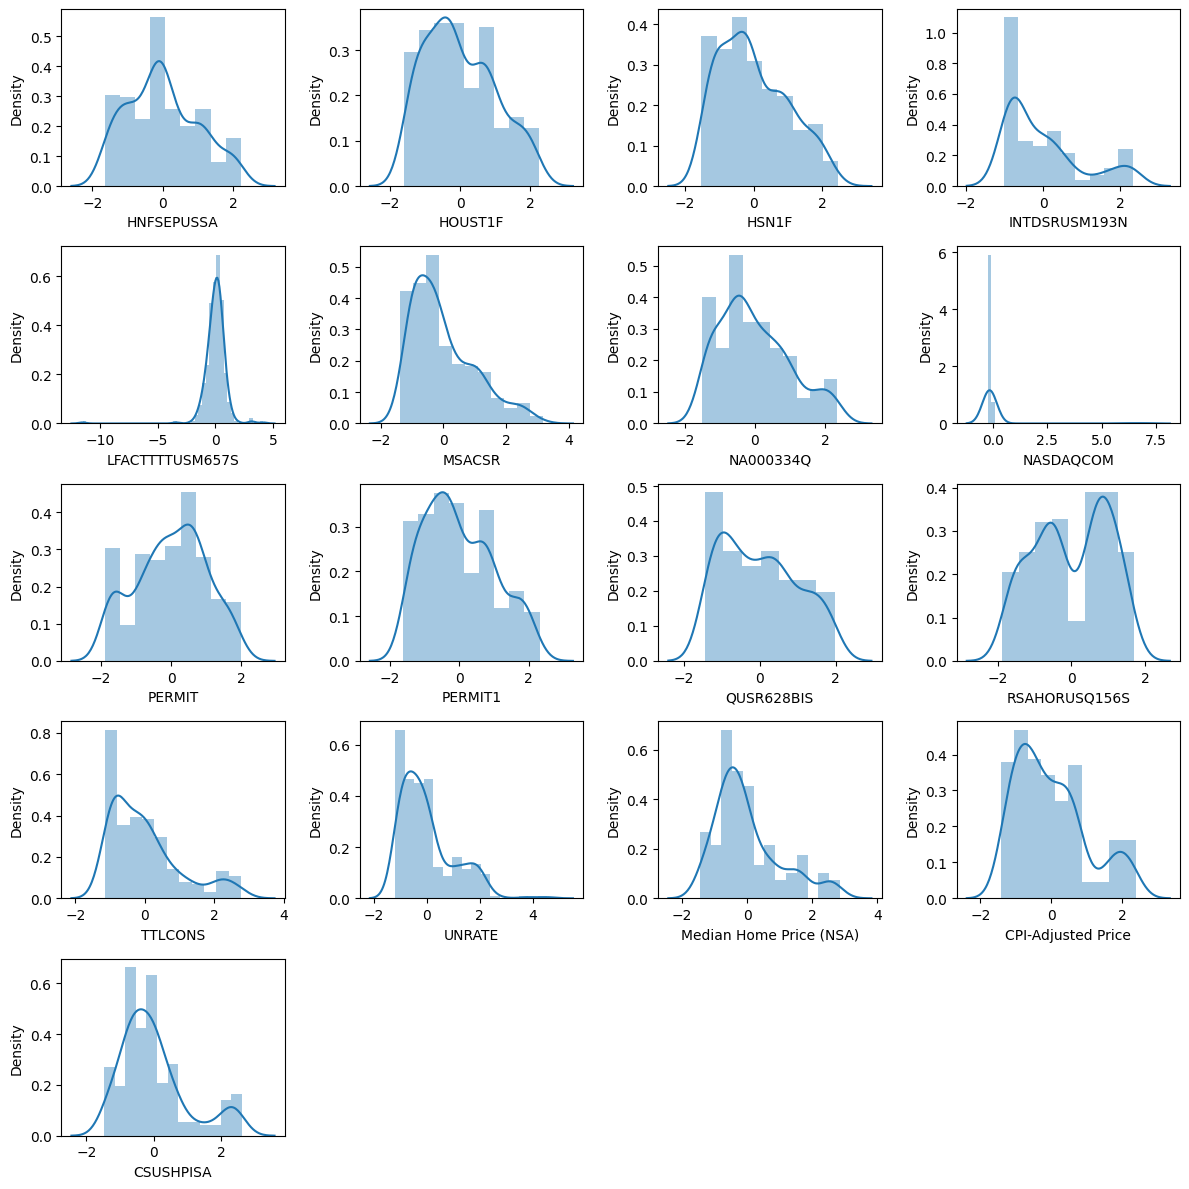

In [ ]:
# visualizing distribution of each feature

fig, axes = plt.subplots(5, 4, figsize=(12, 12))

axes = axes.flatten()

for i in range(1, 18):
    sns.distplot(b.iloc[:, i], kde=True, ax=axes[i - 1])


for i in range(17, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.show()

In [ ]:
## HNFSEPUSSA -->	New One Family Homes for Sale in the United St.--> # it is following the same trend as of S and P HPI
## NA000334Q 	Gross Domestic Product 	: small change in GDP result in huge change in S and P HPI
## Median home price: it is directly related to  s and P HPI
## TTLCONS 	Total Construction Spending: Total Constructio... 	its also directly related to s and P HPI
## CPI --> consumer price index --> following the same trend as of S and P HPI
## UNRATE 	Unemployment Rate 	 --> unemployment rate hardly matters
## Covid crisis didn't affect the HPI, 2008 crisis did.

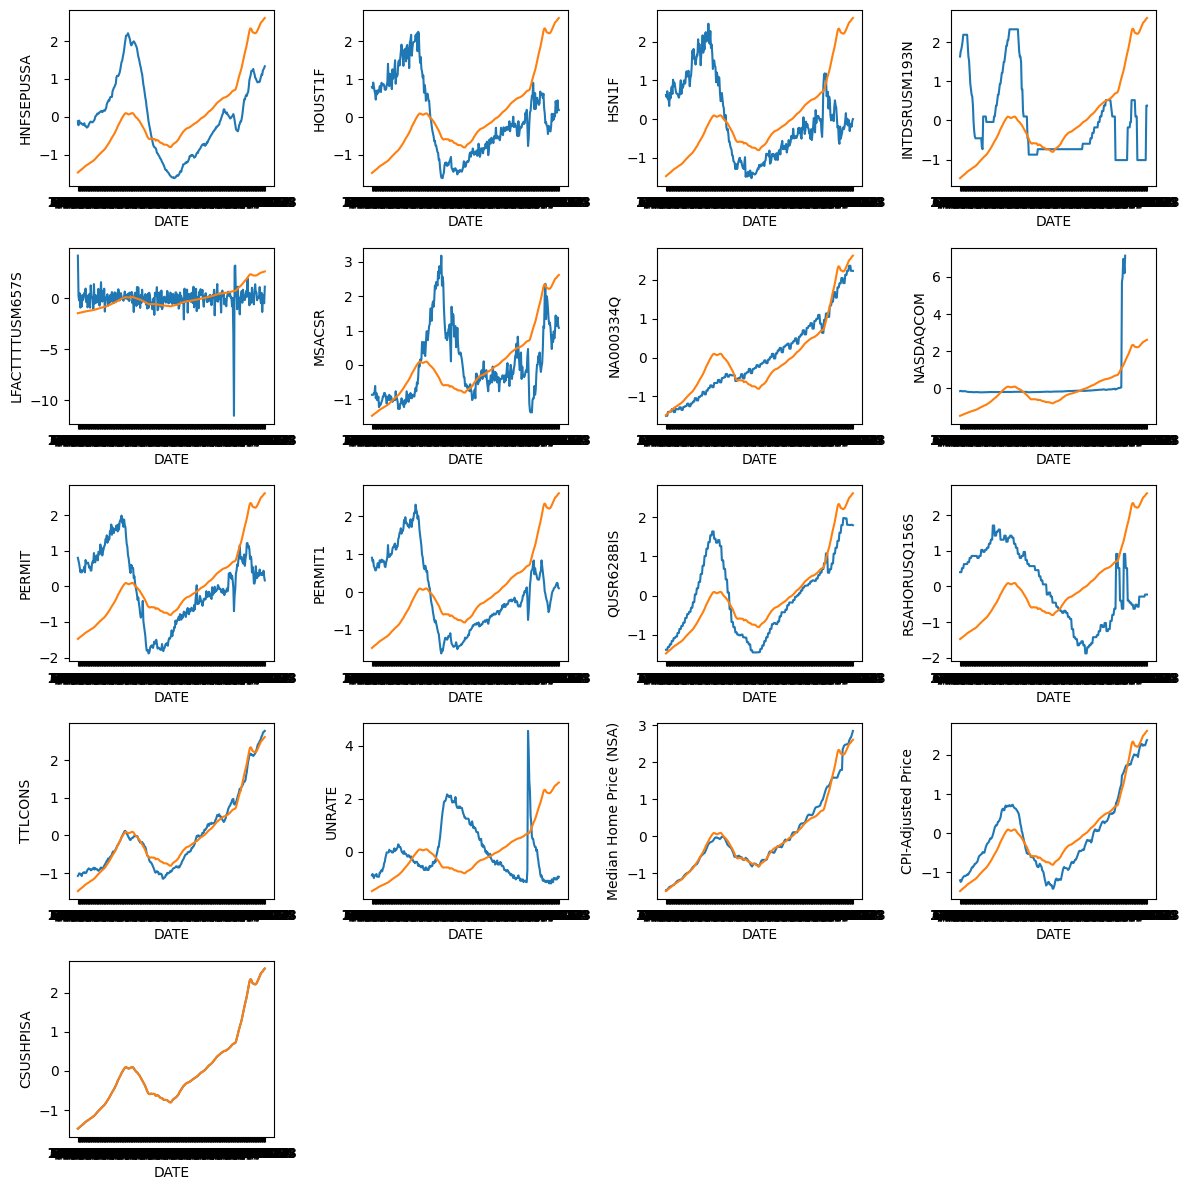

In [ ]:
# visualizing trend of each feature with target feature

fig, axes = plt.subplots(5, 4, figsize=(12, 12))

axes = axes.flatten()

for i in range(1, 18):
    sns.lineplot(x=b.iloc[:, 0],y=b.iloc[:,i], ax=axes[i - 1])
    sns.lineplot(x=b.iloc[:, 0],y=b.iloc[:,-1], ax=axes[i - 1])


for i in range(17, len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()
plt.show()

<Axes: >

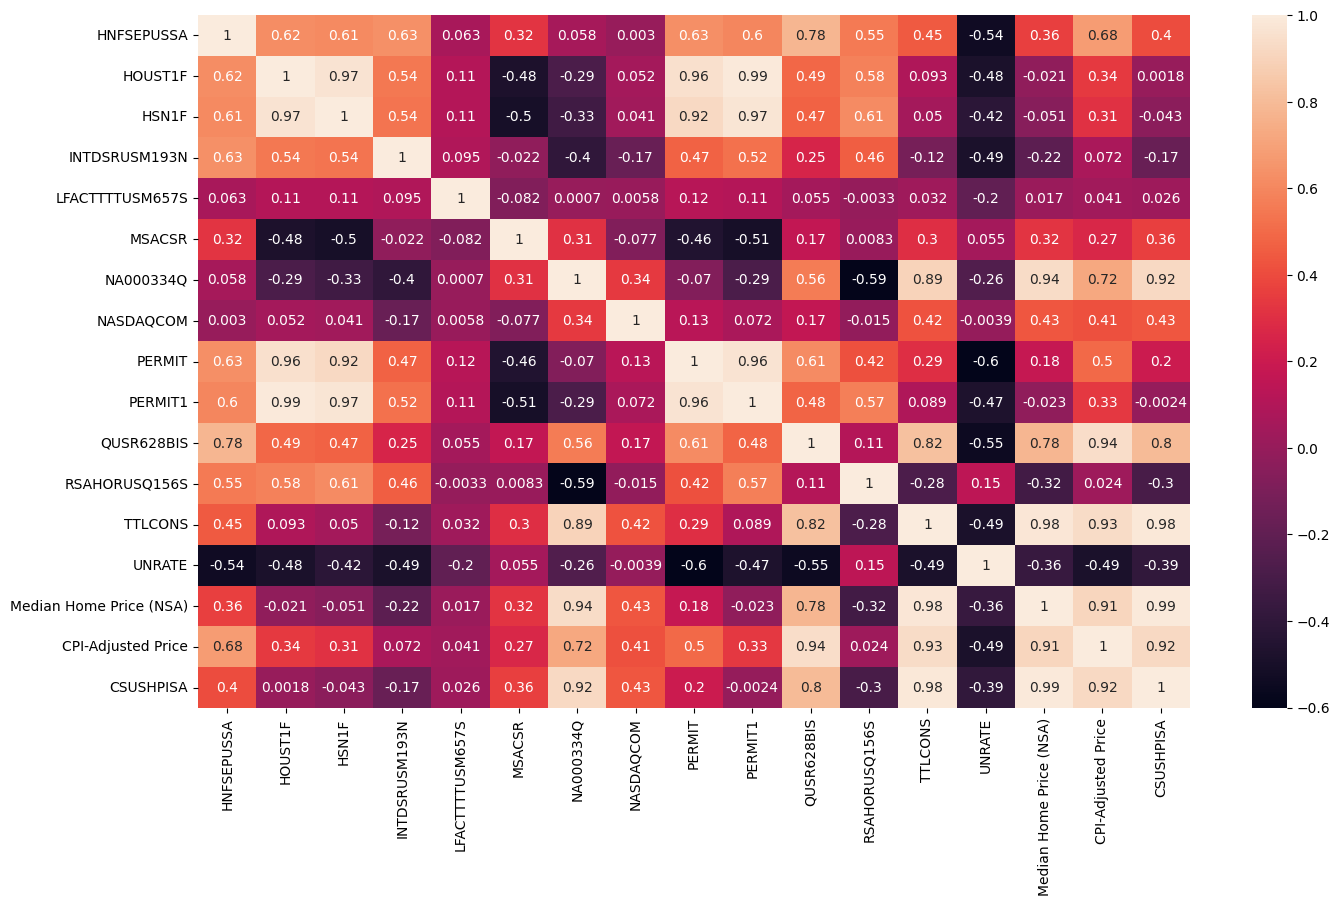

In [ ]:
# Convert the 'DATE' column to datetime objects
df['DATE'] = pd.to_datetime(df['DATE'])

# Extract numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# checking correlation and multicollinearity between features
plt.figure(figsize=(16,9))
sns.heatmap(numerical_df.corr(),annot=True)

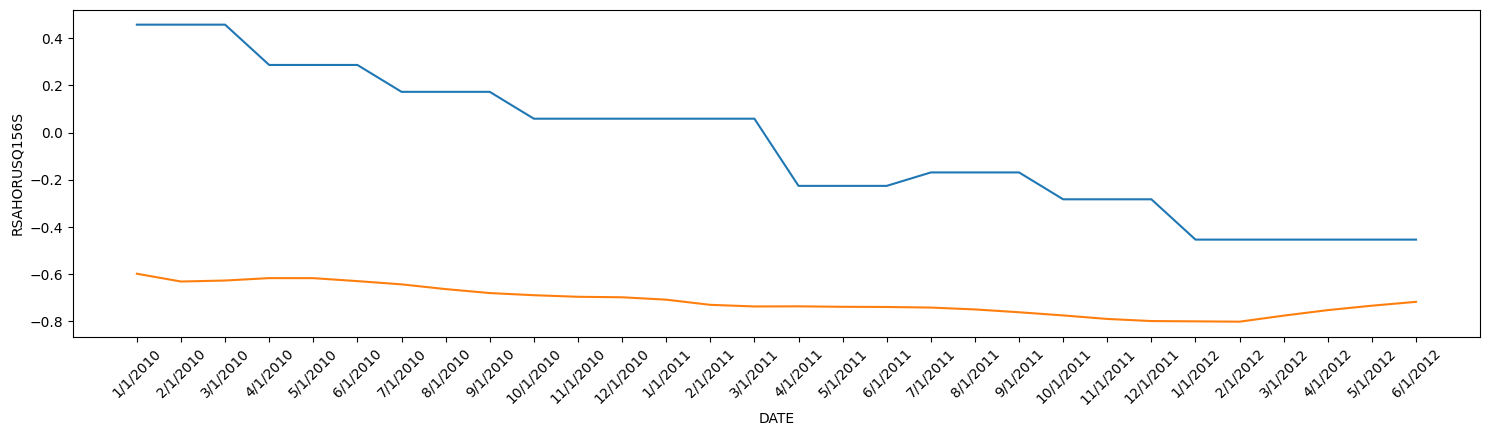

In [ ]:
# checking the trend for specific time window

fig = plt.figure(figsize=(15,4))
sns.lineplot(x=b.iloc[120:150,0], y=b.iloc[120:150,-6])
sns.lineplot(x=b.iloc[120:150, 0],y=b.iloc[120:150,-1])
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

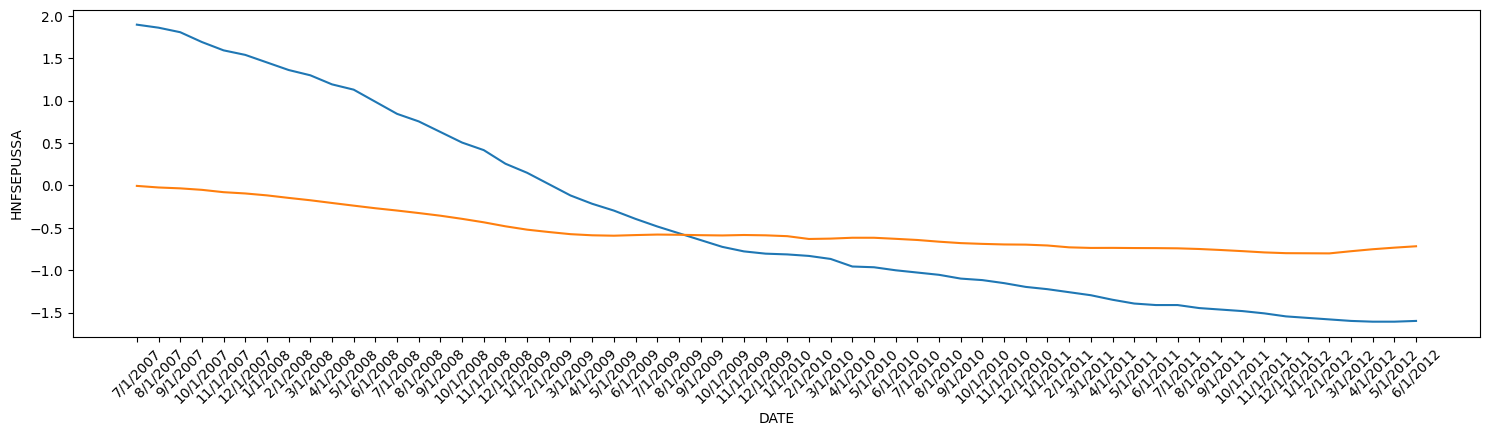

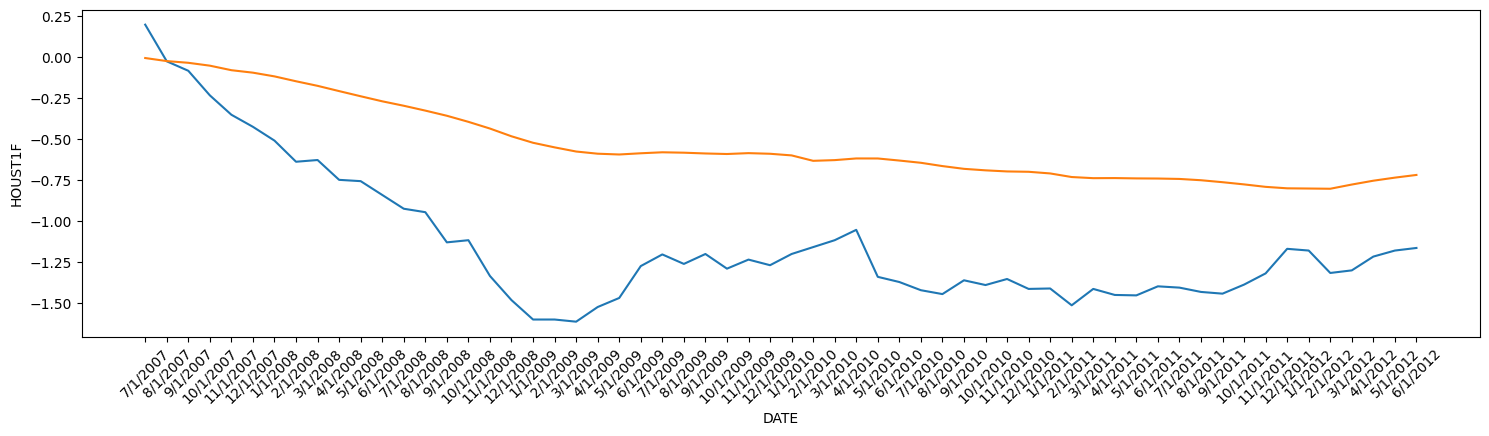

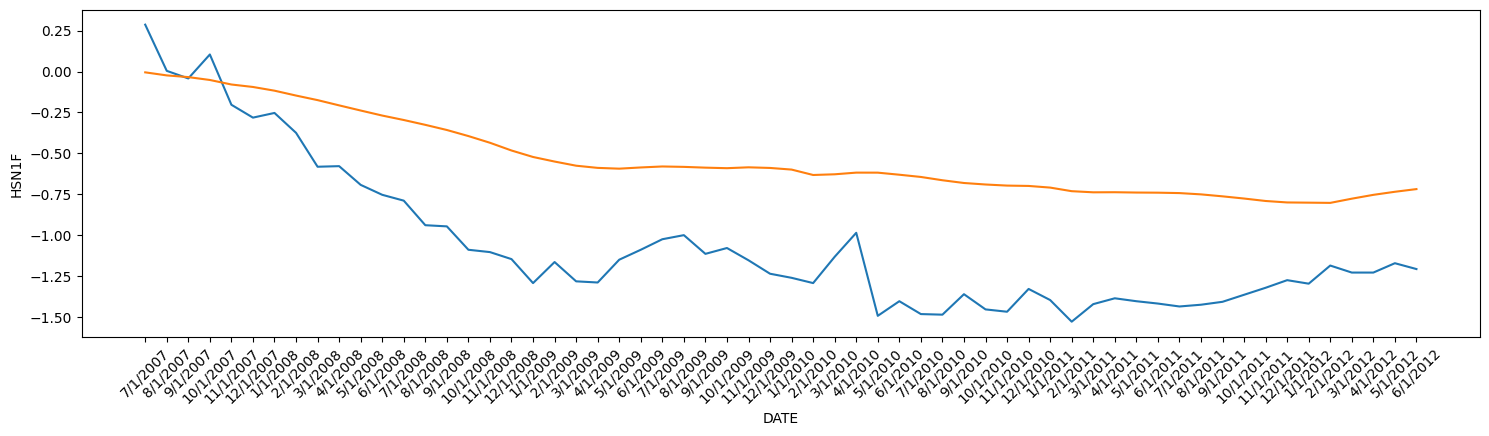

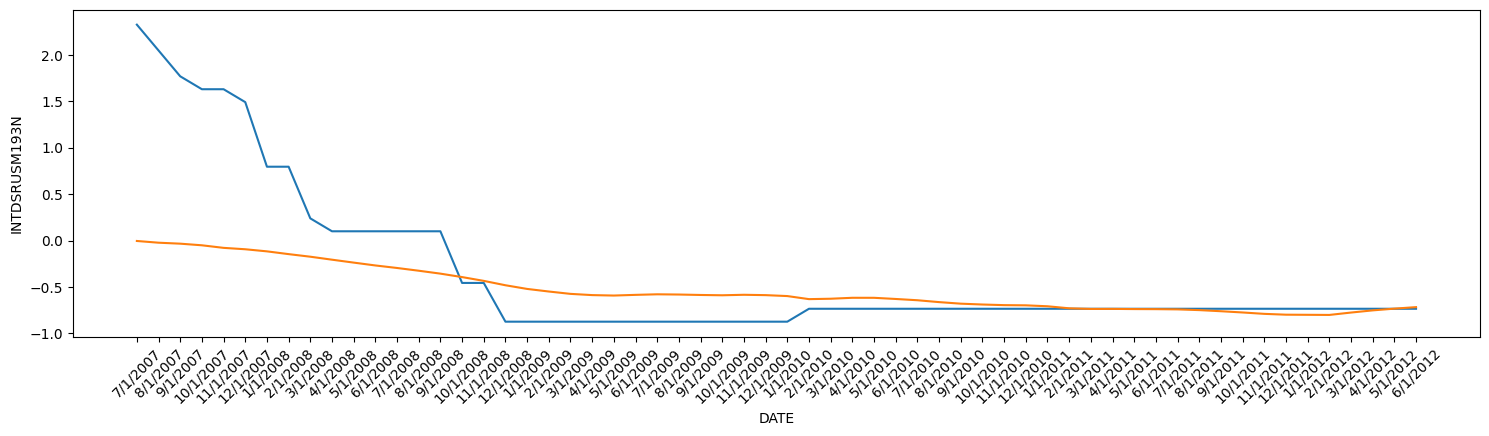

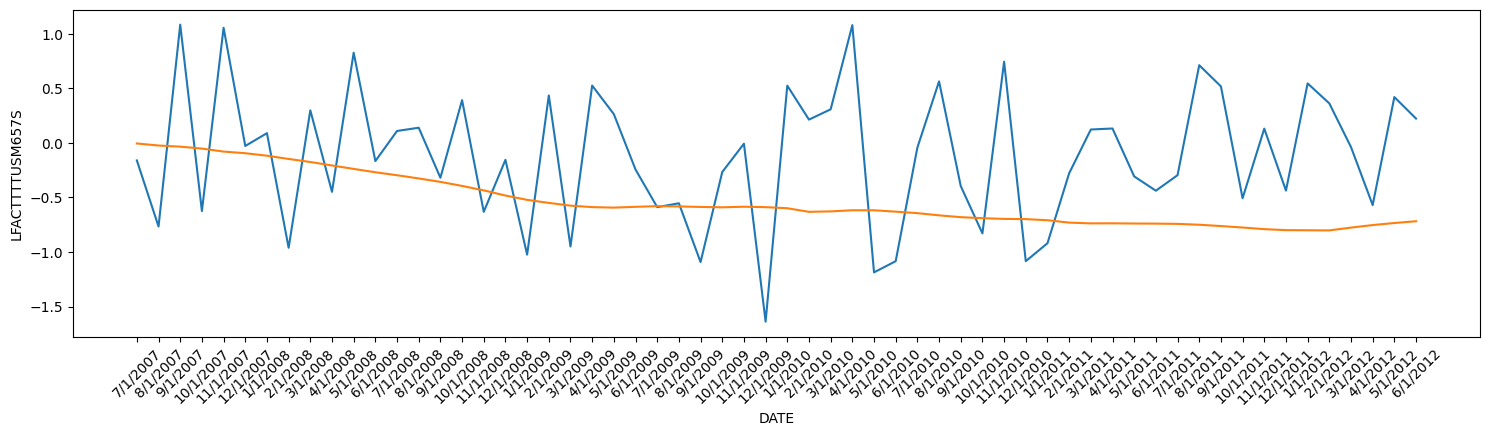

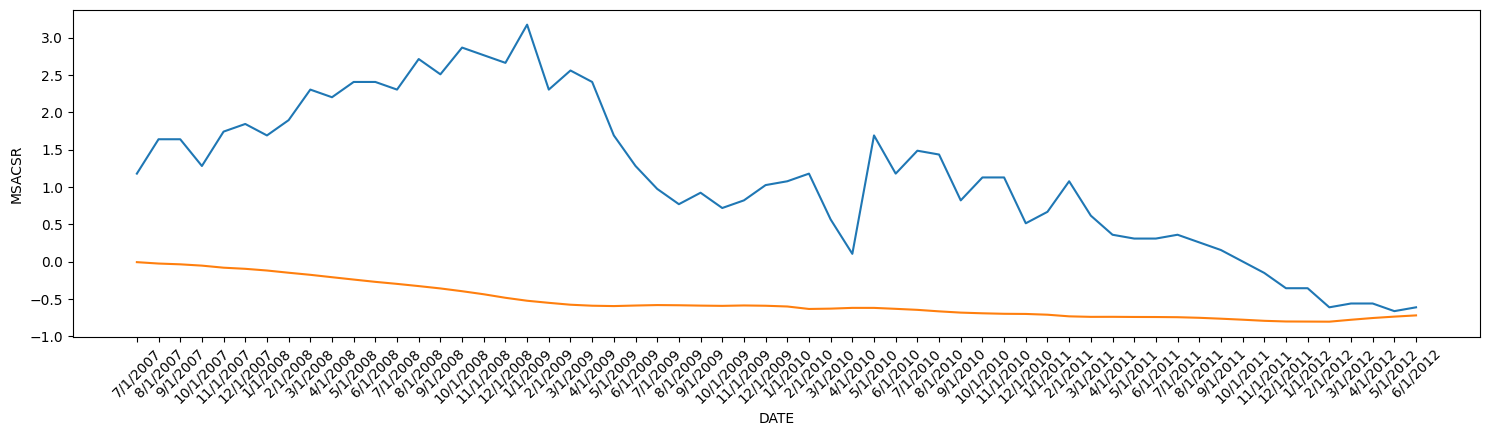

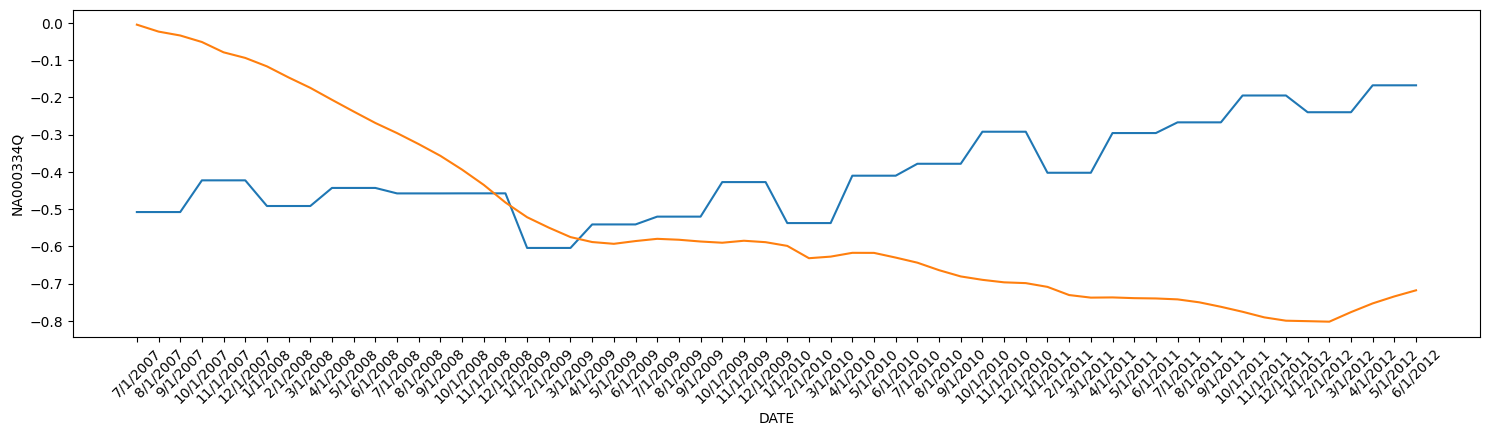

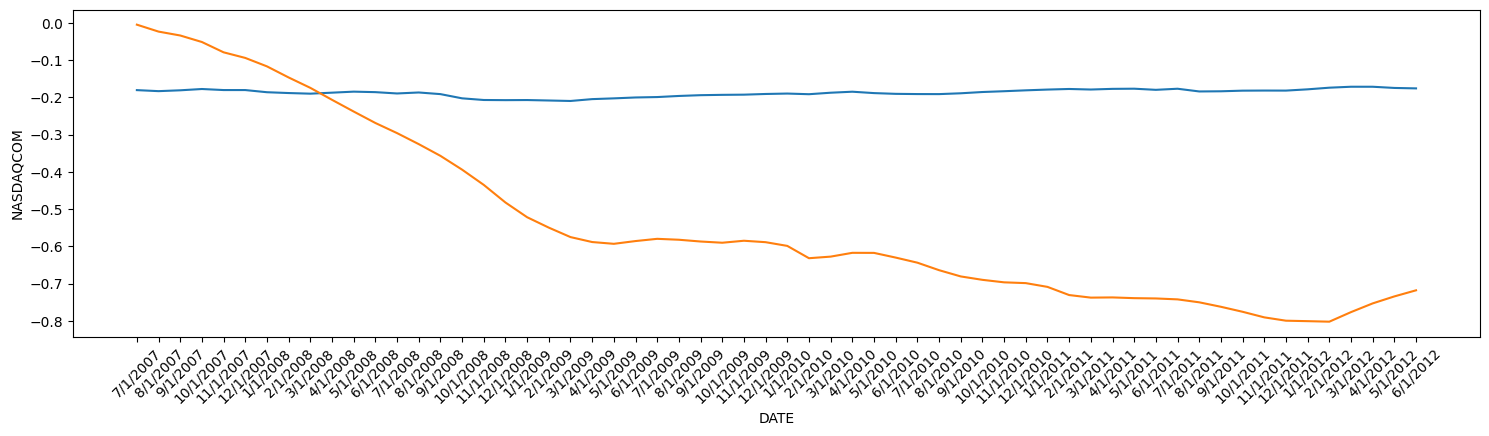

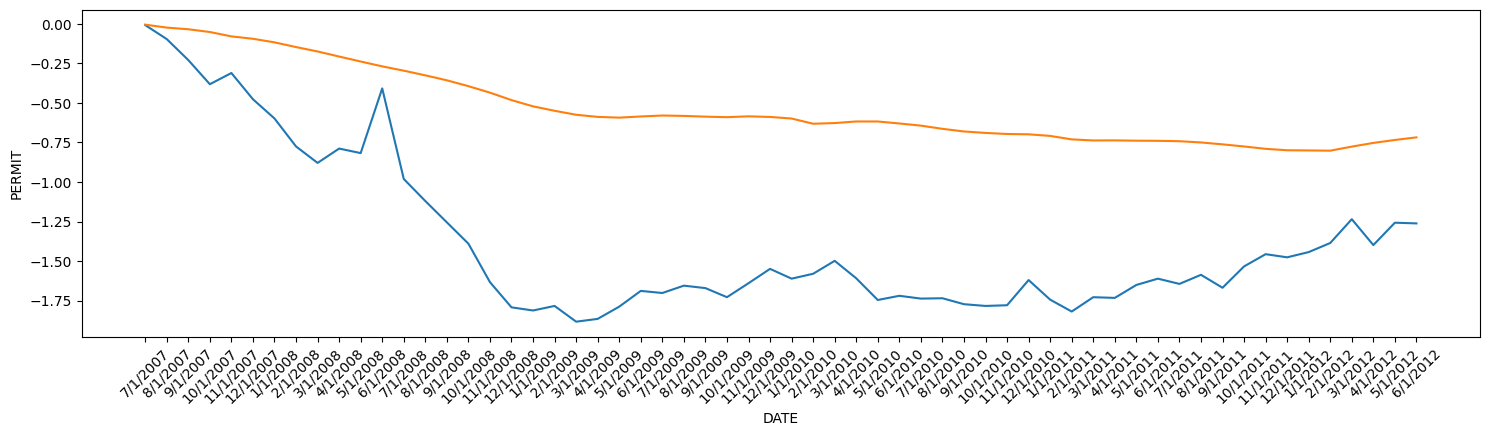

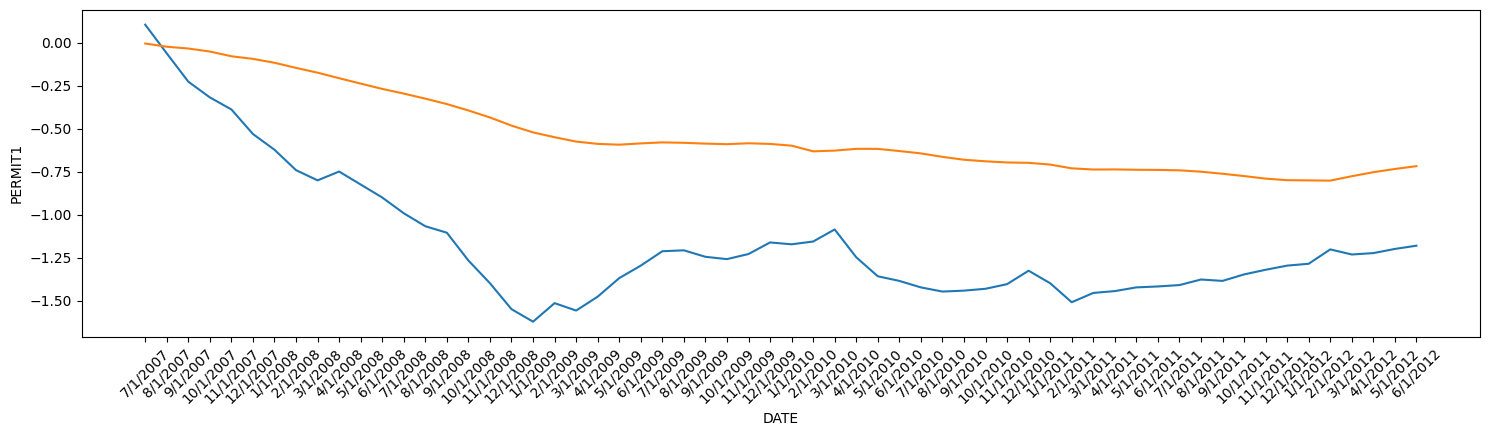

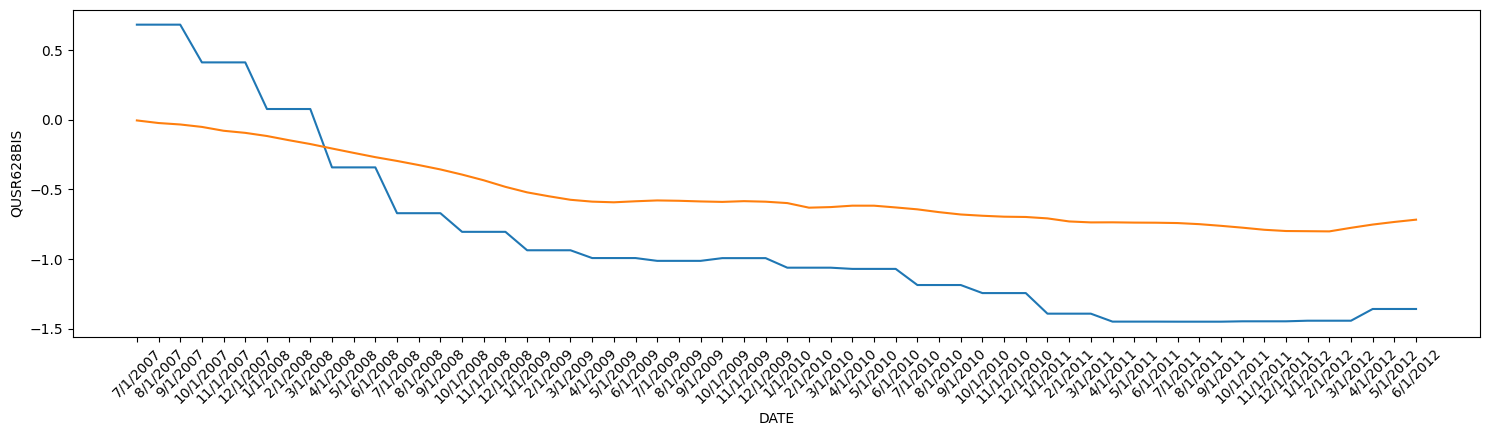

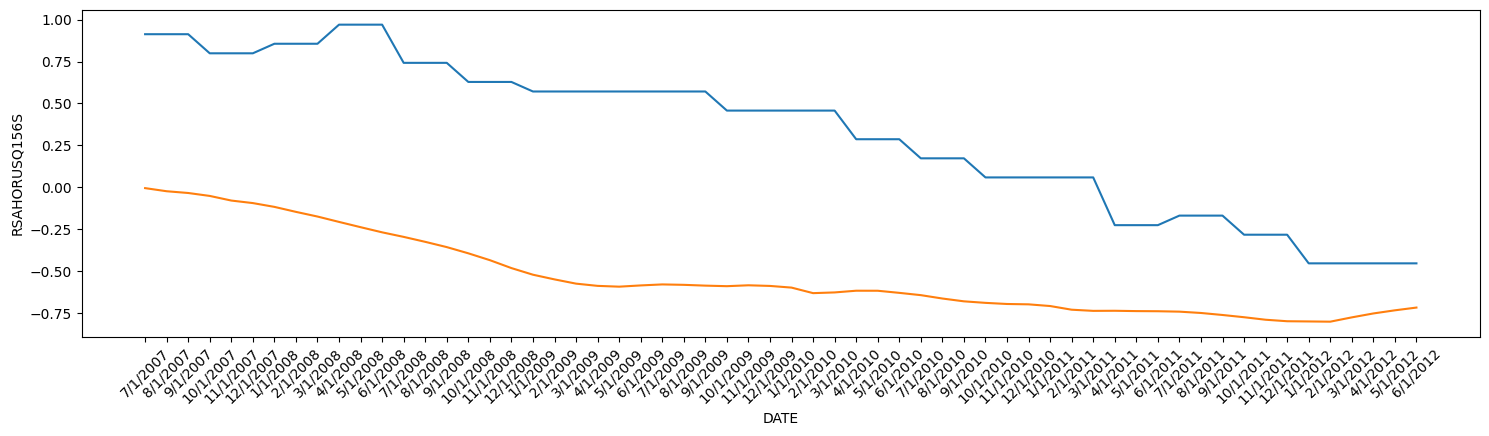

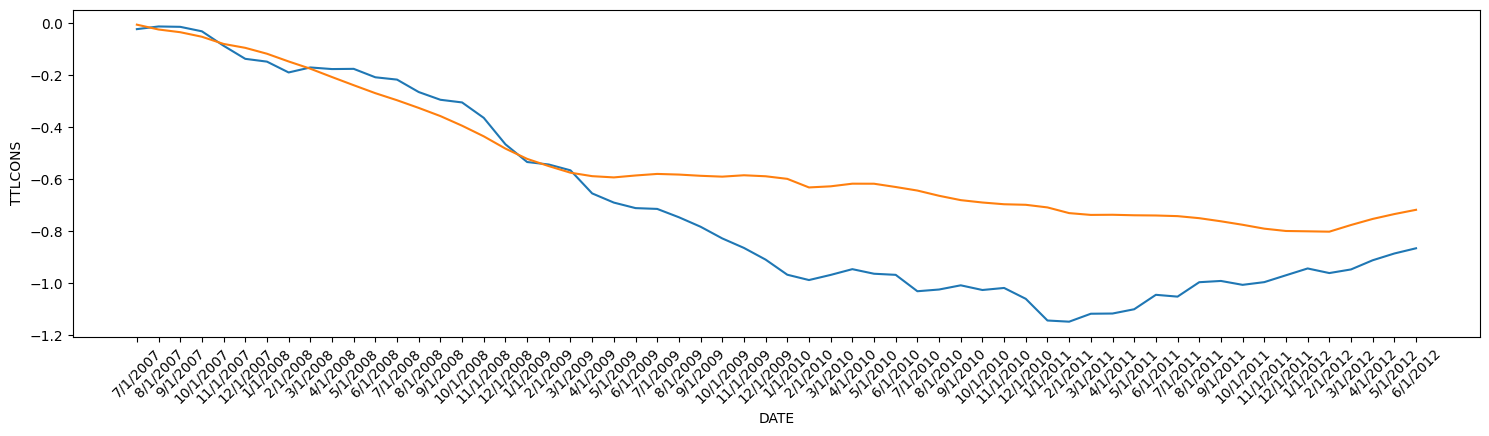

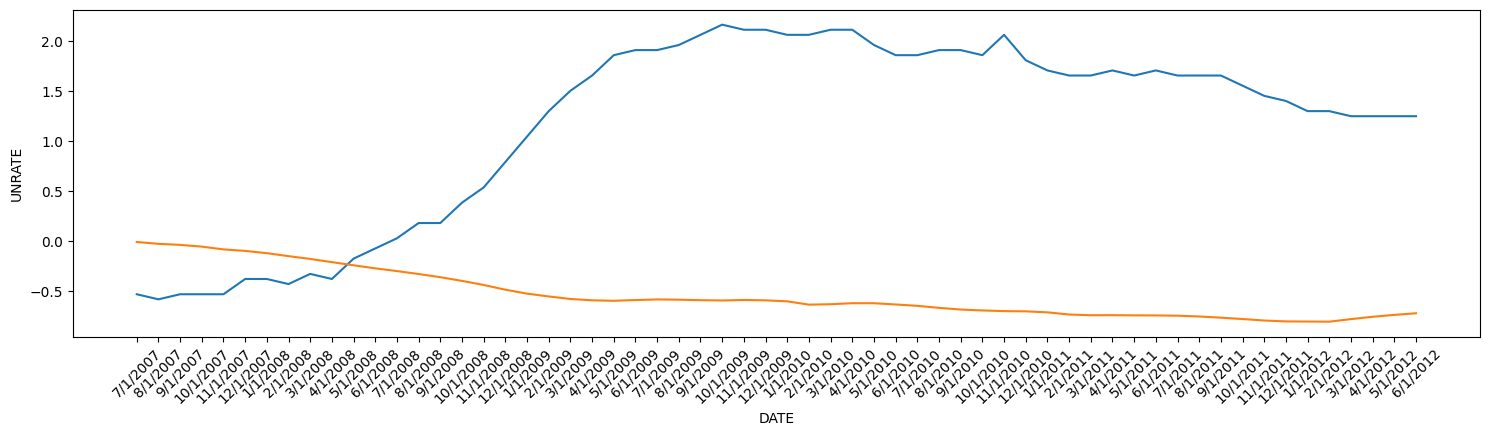

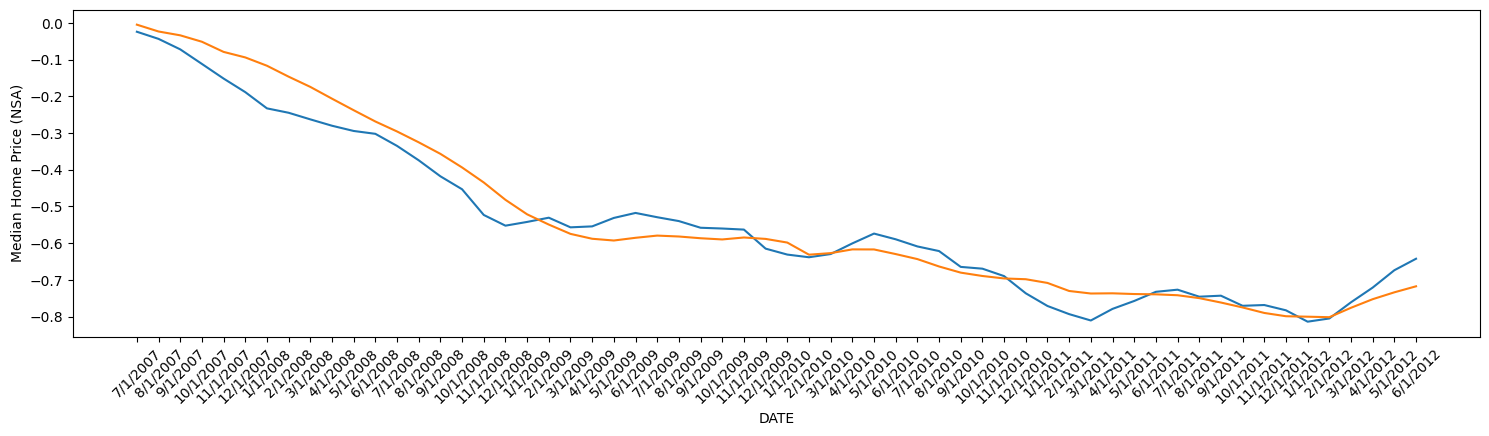

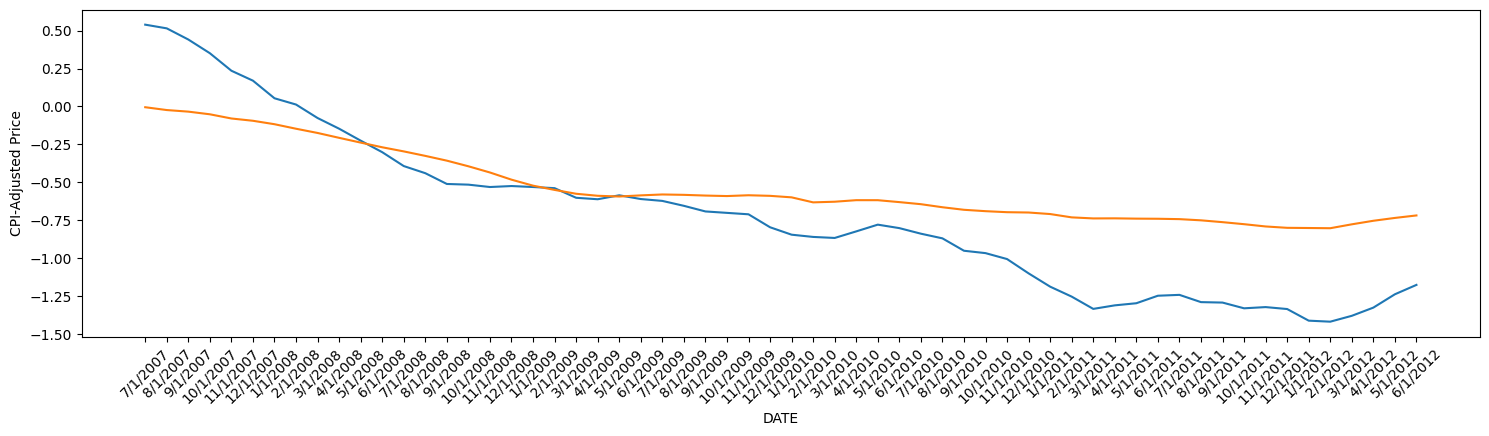

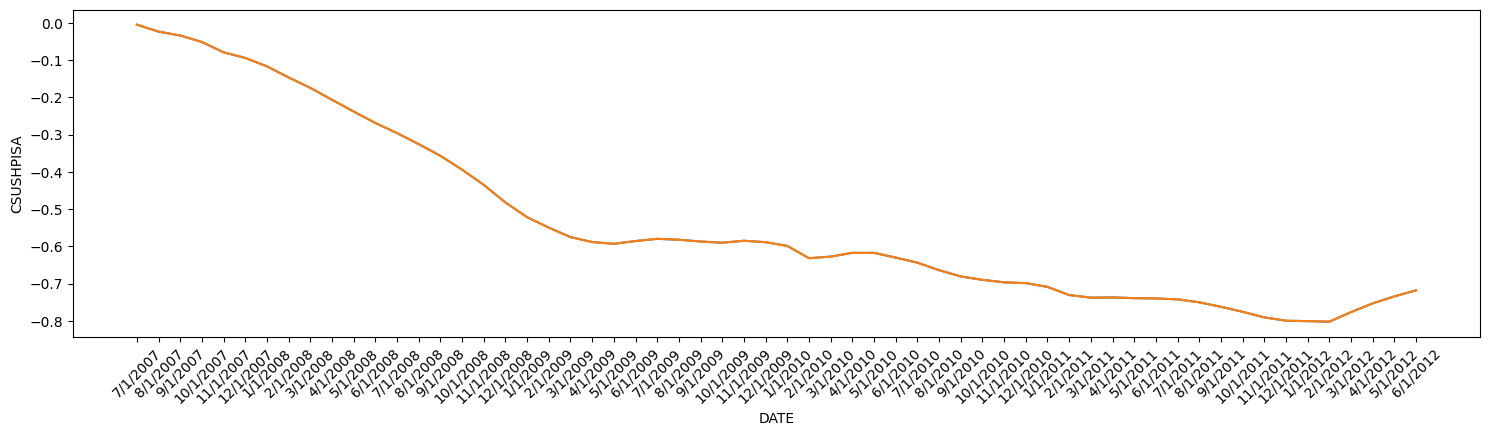

In [ ]:
for i in range(1, 18):
    fig = plt.figure(figsize=(15,4))
    sns.lineplot(x=b.iloc[90:150, 0],y=b.iloc[:,i])
    sns.lineplot(x=b.iloc[90:150, 0],y=b.iloc[:,-1])
    plt.tight_layout()
    plt.xticks(rotation = 45)
    plt.show()

In [ ]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2 , random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:

from sklearn.model_selection import train_test_split

# Assuming 'x' and 'y' are your original data
# ... (Your code to load and prepare x and y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Handle missing values using imputation
imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)  # Use the same imputation strategy on test data

# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Create and fit the Lasso regression model
reg_l = linear_model.Lasso(alpha=0.5)
reg_l.fit(x_train, y_train)  # Now this should work without the ValueError

Lasso(alpha=0.5)

In [ ]:
y_pred=reg_l.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, y_pred)

0.9937401350714627

In [ ]:
coef = reg_l.coef_
print("Lasso Coefficients:")
for feature, coe in zip(x, coef):
    print(f"{feature}: {coe}")

Lasso Coefficients:
HNFSEPUSSA: 0.0
HOUST1F: -0.0
HSN1F: -0.0
INTDSRUSM193N: -0.0
LFACTTTTUSM657S: 0.041362622566459915
MSACSR: 2.6488327295665304
NA000334Q: 22.978841253109454
NASDAQCOM: -0.0
PERMIT: 0.0
PERMIT1: -0.0
QUSR628BIS: 1.7510211488605791
RSAHORUSQ156S: 0.0
TTLCONS: 10.11292078554042
UNRATE: 0.571070692198581
Median Home Price (NSA): 0.0
CPI-Adjusted Price: 19.37352075345103


In [ ]:
y_pred = reg_l.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print(r2_score(y_test, y_pred))

0.9937401350714627


In [ ]:
check = dict.fromkeys(x.columns)

In [ ]:

reg_r = linear_model.Ridge(alpha=0.5)
reg_r.fit(x_train, y_train)

Ridge(alpha=0.5)

In [ ]:
y_pred = reg_r.predict(x_test)

In [ ]:
print(r2_score(y_test, y_pred))

0.9944318948822705


In [ ]:
coefficients = reg_r.coef_

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elastic = ElasticNet(alpha=0.1, l1_ratio=0.3)
elastic.fit(x_train, y_train)
y_pred = elastic.predict(x_test)

In [ ]:
r2_score(y_test, y_pred)

0.9932512691235874

In [ ]:
check = dict.fromkeys(x.columns)

In [ ]:
for i in np.arange(0.7,0.9,0.05):
    for j in np.arange(0.8,1.1,0.1):
        print(f"l1_ratio: {i}, Alpha: {j}")
        elastic = ElasticNet(alpha=j, l1_ratio=i)
        elastic.fit(x_train, y_train)
        coef = elastic.coef_
        y_pred = elastic.predict(x_test)
        c=0
        r2 = r2_score(y_test, y_pred)
        for feat, value in zip(x, coef):
            check[feat]=value
            if check[feat]==0:
                c+=1
                print(feat,value,r2,i)
        print(f"count = {c}")
        print("\n")


l1_ratio: 0.7, Alpha: 0.8
HOUST1F -0.0 0.9882968443726513 0.7
LFACTTTTUSM657S 0.0 0.9882968443726513 0.7
PERMIT 0.0 0.9882968443726513 0.7
PERMIT1 -0.0 0.9882968443726513 0.7
UNRATE -0.0 0.9882968443726513 0.7
count = 5


l1_ratio: 0.7, Alpha: 0.9
HOUST1F -0.0 0.9871267721198146 0.7
LFACTTTTUSM657S 0.0 0.9871267721198146 0.7
PERMIT 0.0 0.9871267721198146 0.7
PERMIT1 -0.0 0.9871267721198146 0.7
UNRATE -0.0 0.9871267721198146 0.7
count = 5


l1_ratio: 0.7, Alpha: 1.0
HOUST1F -0.0 0.9858692841703958 0.7
LFACTTTTUSM657S 0.0 0.9858692841703958 0.7
PERMIT 0.0 0.9858692841703958 0.7
PERMIT1 -0.0 0.9858692841703958 0.7
UNRATE -0.0 0.9858692841703958 0.7
count = 5


l1_ratio: 0.7, Alpha: 1.1
HOUST1F -0.0 0.9845271777118778 0.7
LFACTTTTUSM657S 0.0 0.9845271777118778 0.7
PERMIT 0.0 0.9845271777118778 0.7
PERMIT1 -0.0 0.9845271777118778 0.7
UNRATE -0.0 0.9845271777118778 0.7
count = 5


l1_ratio: 0.75, Alpha: 0.8
HNFSEPUSSA 0.0 0.9893355686450825 0.75
HOUST1F -0.0 0.9893355686450825 0.75
LFACTTTTU

In [ ]:
elastic = ElasticNet(alpha=1, l1_ratio=0.75)
elastic.fit(x_train, y_train)
coef = elastic.coef_
y_pred = elastic.predict(x_test)
r2 = r2_score(y_test, y_pred)
r2

0.9873550276562375

In [ ]:
a = list(zip(x, coef))
sorted(a,key=lambda x: x[1],reverse=True)

[('NA000334Q', 11.662388016291878),
 ('Median Home Price (NSA)', 11.153601179710401),
 ('TTLCONS', 11.033057791027733),
 ('CPI-Adjusted Price', 9.680374613987109),
 ('QUSR628BIS', 6.317968071678145),
 ('MSACSR', 2.500204832485879),
 ('NASDAQCOM', 0.31016143079763675),
 ('HNFSEPUSSA', 0.0),
 ('HOUST1F', -0.0),
 ('LFACTTTTUSM657S', 0.0),
 ('PERMIT', 0.0),
 ('PERMIT1', -0.0),
 ('UNRATE', -0.0),
 ('RSAHORUSQ156S', -0.6307984941841757),
 ('INTDSRUSM193N', -0.9457432885494881),
 ('HSN1F', -1.1534810321828786)]